# Predicting Hotel Booking Cancellations
### Cleaning data and Exploratory Data Analysis (EDA)
This kernel places a strong emphasis on foundational data preparation steps, ensuring dataset quality and readiness for analysis. It involves addressing missing data, optimizing data types, engineering new features, and resolving inconsistencies. These efforts set the stage for a comprehensive exploratory analysis (EDA) to uncover trends and insights related to confirmed bookings, making use of various new visualization techniques, including choropleth maps.

In the following kernel, **2. Data Preprocessing and Predictive Modeling with Classification Algorithms**, we will progress to data preprocessing and predictive modeling. In this phase, we will employ a range of classification algorithms to forecast booking cancellations, ultimately selecting the most accurate model through rigorous evaluation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

### 1. Import data

In [2]:
# Import data from csv file
df = pd.read_csv("./Datasets/hotel_bookings.csv")

# Set the maximum number of columns to display to None
pd.options.display.max_columns = None

display(df.head(), df.shape, df.columns)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


(119390, 32)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### 2. Data Cleaning & Wrangling

In the upcoming section, we will focus on ensuring the dataset's quality and readiness for analysis. This includes handling missing data, converting data types for better analysis, and engineering new features. We'll address inconsistencies in booking information and zero 'ADR' values for confirmed bookings. Additionally, we'll introduce a new feature, 'weekend_or_weekday,' and reorganize columns for improved readability. The final cleaned dataset will be prepared for further exploratory analysis and modeling.

#### Handling Missing or Null Data

In [3]:
# Check for missing values in the DataFrame
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
# Select columns with presence of null values
cols_with_nulls = df.columns[df.isnull().sum() != 0]
cols_with_nulls

Index(['children', 'country', 'agent', 'company'], dtype='object')

In this section, we will address the issue of missing values using three distinct approaches:

    - Removing the 'agent' and 'company' columns: These columns will be dropped from the dataset due to the high number of NaN values they contain.

    - Imputing missing values in the 'children' column: We will replace the four missing values in the 'children' column with the most frequent value found in that variable.

    - Utilizing a Random Forest Classifier for predicting and filling the 488 null entries in the 'country' column.

##### Agent & Company

In [5]:
# Drop 'agent' and 'company' columns due to high NaN counts
df.drop(['agent', 'company'], axis=1,inplace=True)

##### Children

In [6]:
# Display value counts of 'children' column
display(Markdown("Value counts of 'children' column:"))
display(df['children'].value_counts())

# Find and display the most frequent value in the 'children' column
most_frequent_value = df['children'].value_counts().index[0]
display(Markdown(f"\nMost frequent value for 'children' is: {most_frequent_value}"))

# Fill NaN values in 'children' column with the most frequent value
df['children'].fillna(most_frequent_value, inplace=True)

Value counts of 'children' column:

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


Most frequent value for 'children' is: 0.0

##### Country

In [7]:
# Value counts for 'country' variable
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [8]:
# Import required libraries to label categorical columns, train and prepare the predicting model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Create a copy of the original DataFrame 'df' to preserve the original data
df_encoded = df.copy()

In [10]:
# Initialize a LabelEncoder to encode categorical columns
label_encoder = LabelEncoder()

In [11]:
# Define a lambda function to identify categorical columns
is_categorical = lambda col: df_encoded[col].dtype == 'object'

# Use the lambda function to filter and generate a list of categorical columns
categorical_columns = [col for col in df_encoded.columns if is_categorical(col)]

In [12]:
# Remove 'country' variable from the list of categorical columns to prevent label encoding
categorical_columns.remove('country')

# Apply label encoding to each categorical column in the DataFrame
for col in categorical_columns:
    # Initialize and fit LabelEncoder for the current column
    label_encoder.fit(df_encoded[col])
    
    # Transform and replace the column with encoded values
    df_encoded[col] = label_encoder.transform(df_encoded[col])

In [13]:
# Check for missing values in the encoded DataFrame
df_encoded.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [14]:
# Divide the dataset into two subsets: one with known 'country' values
# and the other with missing or NaN 'country' values.
known_country_data = df_encoded[df_encoded['country'].notnull()]
unknown_country_data = df_encoded[df_encoded['country'].isnull()]

In [15]:
# Split the dataset with known 'country' values into features (X) and the target variable (y)
X = known_country_data.drop('country', axis=1)
y = known_country_data['country']

In [16]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier()

# Train the model on the known 'country' data
model.fit(X_train, y_train)

# Predict the missing 'country' values for the data with NaN values
predicted_countries = model.predict(unknown_country_data.drop('country', axis=1))

In [18]:
# Calculate the unique predicted 'country' values and their counts
unique_values, counts = np.unique(predicted_countries, return_counts=True)

# Print the unique predicted 'country' values and their counts
for value, count in zip(unique_values, counts):
    print(f"Country {value}: {count}")

Country CHN: 1
Country ESP: 5
Country GBR: 7
Country GEO: 1
Country IRL: 4
Country PRT: 469
Country RUS: 1


In [19]:
# Check if the total count of predicted countries matches the count of null values in df['country']
df['country'].isnull().sum() == counts.sum()

True

In [20]:
# Fill the missing 'country' values in original DataFrame using the predicted countries from the model
df.loc[df['country'].isnull(), 'country'] = predicted_countries

In [21]:
# Check if there are any remaining NaN values
display(Markdown('Missing values in the dataframe: {}'.format(df.isnull().sum().sum())))

Missing values in the dataframe: 0

#### Inconsistent Data (I)
In the context of hotel bookings, it's imperative to maintain data consistency. Reservations should always involve at least one guest, whether it be an adult, child, or baby. Therefore, any entries where the total count of 'Adults,' 'Children,' and 'Babies' sums to zero will be considered inconsistent and removed from the dataset to ensure data quality.

In [22]:
# Define filter criteria
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

# # Display relevant columns for filtered rows
display(df[['hotel', 'adults','children','babies']][filter1].head(), df[filter1].shape)

,hotel,adults,children,babies
2224,Resort Hotel,0,0.0,0
2409,Resort Hotel,0,0.0,0
3181,Resort Hotel,0,0.0,0
3684,Resort Hotel,0,0.0,0
3708,Resort Hotel,0,0.0,0


(180, 30)

In [23]:
# Drop rows where the total number of customers is zero
df = df[~filter1]

# Display the updated data shape
print('Data shape after dropping rows with zero total guests:', df.shape)

Data shape after dropping rows with zero total guests: (119210, 30)


#### Column types

In [24]:
# Check the data types of each column in the DataFrame
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

##### Is canceled
To enhance visualization during exploratory data analysis, we will now convert the 'is_canceled' column into categorical values, specifically 'No' and 'Yes.'

In [25]:
# Define a mapping dictionary: Map 0 to 'No' and 1 to 'Yes' 
is_canceled_mapping = {0: 'No', 1: 'Yes'}

# Replace values in the 'is_canceled' column using the defined mapping
df['is_canceled'] = df['is_canceled'].map(is_canceled_mapping)

# Display the first few rows of the 'is_canceled' column and its data type
display(Markdown("Updated 'is_canceled' column:"))
display(df['is_canceled'].head(), df['is_canceled'].dtype)

Updated 'is_canceled' column:

0    No
1    No
2    No
3    No
4    No
Name: is_canceled, dtype: object

dtype('O')

##### Children

In [26]:
# Change data type of 'children' column to integer
df['children'] = df['children'].astype(int)

# Check the updated data type of the 'children' column
df['children'].dtypes

dtype('int64')

##### Reservation Status Date

In [27]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%m/%d/%Y')

# Check the updated data type of the 'reservation_status_date' column
df['reservation_status_date'].dtypes

dtype('<M8[ns]')

#### New columns: 'Arrival Date Month Num', 'Check-in date', 'Total Guests' and 'Total Nights'
To expand our dataset, we're introducing additional columns that provide extra insights beyond the original dataframe.

##### Arrival Date Month Num

In [28]:
# Define the mapping from month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Replace values in the 'arrival_date_month' column with corresponding numeric values
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

##### Check-in Date

In [29]:
# Concatenate the date components (year, month, and day) into a single string column
date_components = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month_num'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)

# Convert the concatenated column to datetime format
df['check_in_date'] = pd.to_datetime(date_components, format='%Y-%m-%d')

# Optionally, you can convert 'check_in_date' to a different datetime format if needed
# df['check_in_date'] = df['check_in_date'].dt.strftime('%m/%d/%Y')

##### Total Guests

In [30]:
# Create a new column 'total_guests' by summing up the number of adults, children, and babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']

##### Total Nights

In [31]:
# Create a new column 'total_nights' to represent the length of stay for each booking
total_nights_list = []

# Iterate through each booking in the DataFrame
for index, row in df.iterrows():
    # If the booking was canceled or marked as a no-show, assign 0 for the total nights
    if (row['reservation_status'] == 'Canceled') or (row['reservation_status'] == 'No-Show'):
        total_nights_list.append(0)
    else:
        # If not, calculate the number of nights stayed by subtracting the check-in date from the reservation status date
        total_nights_list.append((row['reservation_status_date'] - row['check_in_date']).days)

# Assign the list as a new column 'total_nights' in the DataFrame
df['total_nights'] = total_nights_list

In [32]:
# # Display the first few rows of the new columns: 'arrival_date_month_num', 'check_in_date', 'total_guests', and 'total_nights'
df[['arrival_date_month_num', 'check_in_date', 'total_guests', 'total_nights']].head()

,arrival_date_month_num,check_in_date,total_guests,total_nights
0,7,2015-07-01,2,0
1,7,2015-07-01,2,0
2,7,2015-07-01,1,1
3,7,2015-07-01,1,1
4,7,2015-07-01,2,2


#### Inconsistent Data (II):

In this section, we address cases where bookings are marked as 'not canceled' ('is_canceled' = 'No'), but inconsistencies arise. There are two scenarios:

1. In 627 cases, bookings lack values for both 'stays_in_(week/weekend)_nights' and 'total_nights,' despite having 'reservation_status' marked as 'Check-Out'.
    - In these scenarios, we will adjust the 'is_canceled' value to 'Yes' and change 'reservation_status' to 'Canceled.'

2. In 20 cases, 'stays_in_(week/weekend)_nights' holds a value other than 0, while 'total_nights' remains 0. This discrepancy occurs when 'reservation_status_date' (the check-out date) matches 'check_in_date'.
    - For these cases, we will sum the 'stays_in_(week/weekend)_nights' values, subtract that count from the 'check_in_date,' and update 'total_nights' accordingly.

This approach aims to rectify the inconsistencies in the data, ensuring accurate information for analysis.


In [33]:
# Filter for first type of cases
cancelled_mask = (df['is_canceled'] == 'No') & (df['reservation_status'] == 'Check-Out') & (df['total_nights'] == 0)
filtered_df = df[cancelled_mask]

# Display the filtered data along with its shape
display(filtered_df[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status','reservation_status_date','total_nights']].head(5),
        filtered_df.shape)

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,reservation_status,reservation_status_date,total_nights
0,No,0,0,Check-Out,2015-07-01,0
1,No,0,0,Check-Out,2015-07-01,0
24,No,2,5,Check-Out,2015-07-01,0
167,No,0,0,Check-Out,2015-07-06,0
168,No,0,0,Check-Out,2015-07-06,0


(647, 34)

In [34]:
# Filter for the second kind of cases
weekend_nights_mask = (filtered_df['stays_in_weekend_nights'] != 0) | (filtered_df['stays_in_weekend_nights'] != 0)
filtered_weekend_df = filtered_df[weekend_nights_mask]

# Display the filtered data along with its length
display(filtered_weekend_df[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status','reservation_status_date','check_in_date','total_nights']].head(5)), len(filtered_weekend_df)

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,reservation_status,reservation_status_date,check_in_date,total_nights
24,No,2,5,Check-Out,2015-07-01,2015-07-01,0
313,No,2,5,Check-Out,2015-07-12,2015-07-12,0
1657,No,3,7,Check-Out,2015-09-07,2015-09-07,0
2345,No,2,5,Check-Out,2015-10-09,2015-10-09,0
2407,No,4,5,Check-Out,2015-10-11,2015-10-11,0


(None, 20)

In [35]:
# Check if all dates of 'reservation_status_date' and 'check_in_date' are equal
filtered_weekend_df['reservation_status_date'] == filtered_weekend_df['check_in_date']

24       True
313      True
1657     True
2345     True
2407     True
2420     True
5957     True
6755     True
6756     True
6800     True
6833     True
6835     True
7865     True
7877     True
7886     True
7923     True
7929     True
7932     True
8148     True
40294    True
dtype: bool

##### Second type cases

In [36]:
# Iterate through each row in the df
for index, row in df.iterrows():
    # Check if the index is present in the filtered_weekend_df index
    if index in filtered_weekend_df.index:
        # Calculate the total nights that include weekends
        weekend_nights = row['stays_in_weekend_nights'] + row['stays_in_week_nights']
        
        # Subtract the weekend nights from the original check-in date
        updated_check_in_date = row['check_in_date'] - pd.Timedelta(days=weekend_nights)
        
        # Update the total nights and check-in date in the df
        df.at[index, 'total_nights'] += weekend_nights
        df.at[index, 'check_in_date'] = pd.to_datetime(updated_check_in_date, format='%Y-%m-%d')

In [37]:
# Review changes for a specific row (Row 24)
df.loc[24,['is_canceled', 'stays_in_weekend_nights',
           'stays_in_week_nights', 'reservation_status',
           'reservation_status_date','check_in_date','total_nights']]

is_canceled                                 No
stays_in_weekend_nights                      2
stays_in_week_nights                         5
reservation_status                   Check-Out
reservation_status_date    2015-07-01 00:00:00
check_in_date              2015-06-24 00:00:00
total_nights                                 7
Name: 24, dtype: object

##### First type cases

In [38]:
# Refreshing the filter to identify bookings with inconsistencies (627)
# These are cases where reservations are marked as 'Check-Out' but have a total nights count of 0,
# and the 'is_canceled' status is 'No.'
cancelled_mask = (df['is_canceled'] == 'No') & (df['reservation_status'] == 'Check-Out') & (df['total_nights'] == 0)

# Apply the refreshed filter
filtered_df = df[cancelled_mask]

# Display the filtered DataFrame
display(filtered_df[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status','reservation_status_date','total_nights']].head(5),
        'New Length: ', filtered_df.shape)

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,reservation_status,reservation_status_date,total_nights
0,No,0,0,Check-Out,2015-07-01,0
1,No,0,0,Check-Out,2015-07-01,0
167,No,0,0,Check-Out,2015-07-06,0
168,No,0,0,Check-Out,2015-07-06,0
196,No,0,0,Check-Out,2015-07-07,0


'New Length: '

(627, 34)

In [39]:
# Iterate through each row in the df
for index, row in df.iterrows():
    # Check if the index is present in the filtered_df index
    if index in filtered_df.index:
        # Update the 'is_canceled' and 'reservation_status' values to 'Yes' and 'Canceled,' respectively
        df.at[index, 'is_canceled'] = 'Yes'
        df.at[index, 'reservation_status'] = 'Canceled'

In [40]:
# Check again if all changes were properly done
cancelled_mask = (df['is_canceled'] == 'No') & (df['reservation_status'] == 'Check-Out') & (df['total_nights'] == 0)
filtered_df = df[cancelled_mask]

display(filtered_df[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status','reservation_status_date','total_nights']].head(5),
        'New Length: ', filtered_df.shape)

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,reservation_status,reservation_status_date,total_nights


'New Length: '

(0, 34)

#### Categorizing Night Stays: Creating a New Feature
We will develop a function to classify night stays as either occurring during weekdays, weekends, or both. The outcomes will be saved in a new 'weekend_or_weekday' column.

In [41]:
# Display the first few rows of the selected columns
df[['stays_in_weekend_nights','stays_in_week_nights', 'total_nights']].head()

,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2


In [42]:
# Create a function to determine the type of stay (weekdays, weekends, or both)
# and assign values to a new column.

def week_function(row):
    
    """Function to create values for a new column to determine whether the booking
    includes week nights, weekend nights, or both types."""
    
    # Define the features/columns to be used
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    # Check if the stay includes only weekend nights
    if row[feature2] == 0 and row[feature1] > 0:
        return 'stay_just_weekend'
    
    # Check if the stay includes only weekdays
    elif row[feature2] > 0 and row[feature1] == 0:
        return 'stay_just_weekdays'
    
    # Check if the stay includes both weekdays and weekend nights
    elif row[feature2] > 0 and row[feature1] > 0:
        return 'stay_both_weekdays_weekends'
        
    # Handle cases with undefined data
    else:
        return 'undefined_data'


In [43]:
# Call the function
df['weekend_or_weekday']=df.apply(week_function, axis=1)

In [44]:
# Check value counts for the new column
df['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    60388
stay_just_weekdays             51250
stay_just_weekend               6927
undefined_data                   645
Name: weekend_or_weekday, dtype: int64

In [45]:
# Review all entries with undefined night stay data
undefined_night_data = df[['is_canceled','stays_in_weekend_nights','stays_in_week_nights','total_nights']][df['weekend_or_weekday']=='undefined_data']

# Display the first few rows and the shape of the filtered data
display(undefined_night_data.head(), undefined_night_data.shape)

,is_canceled,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,Yes,0,0,0
1,Yes,0,0,0
167,Yes,0,0,0
168,Yes,0,0,0
196,Yes,0,0,0


(645, 4)

In [46]:
# Check if there are any confirmed bookings included in undefined_data or if all are canceled cases
confirm_book_no_night_data = len(undefined_night_data[undefined_night_data['is_canceled'] == 'No'])

display(Markdown(f"There are {confirm_book_no_night_data} confirmed bookings with undefined night data"))

There are 0 confirmed bookings with undefined night data

#### Inconsistent Data (III):

Now, let's focus on cases where bookings are labeled with 'is_canceled' as 'No,' but they possess an 'adr' (Average Daily Rate) value of 0.

    - In such situations, we will update the booking status to 'canceled,' and, if required, eliminate any associated night stay data.


In [47]:
# Filter for confirmed bookings where 'is_canceled' is 'No' and 'adr' is 0
confirmed_bookings_0_adr = df[(df['is_canceled'] == 'No') & (df['adr'] == 0)]

# Display the selected columns
display(
    confirmed_bookings_0_adr[['is_canceled', 'assigned_room_type', 'adr', 'reservation_status', 'total_nights']].head(), 
    Markdown(f"There are {len(confirmed_bookings_0_adr)} confirmed bookings whose 'adr' value is 0.")
)

,is_canceled,assigned_room_type,adr,reservation_status,total_nights
125,No,H,0.0,Check-Out,1
428,No,A,0.0,Check-Out,2
1655,No,I,0.0,Check-Out,46
1705,No,H,0.0,Check-Out,1
2114,No,H,0.0,Check-Out,2


There are 1000 confirmed bookings whose 'adr' value is 0.

In [48]:
# Check mean and median 'adr' for each type of room and hotel with confirmed bookings and 'adr' value different than 0
confirmed_bookings_not_0_adr = df[(df['is_canceled'] == 'No') & (df['adr'] != 0)].groupby(['hotel', 'assigned_room_type'])['adr'].agg(['mean', 'median'])

# Round the mean and median values to 2 decimals
confirmed_bookings_not_0_adr = confirmed_bookings_not_0_adr.round(2)

# Display the mean and median 'adr' values for each room type and hotel
confirmed_bookings_not_0_adr

mean  median
hotel        assigned_room_type                
City Hotel   A                    99.08   95.00
             B                    97.52   93.64
             C                   110.42  108.00
             D                   117.91  115.28
             E                   142.22  140.26
             F                   178.09  179.30
             G                   196.60  204.82
             K                   112.77  108.00
Resort Hotel A                    81.31   65.00
             B                   105.82   95.00
             C                   108.82   87.00
             D                    82.43   65.00
             E                   102.46   85.50
             F                   120.39  102.00
             G                   153.18  139.00
             H                   161.82  150.12
             I                    90.87   70.20

In [49]:
# Filter the data for confirmed bookings with 'adr' values different than 0
filtered_data = df[(df['is_canceled'] == 'No') & (df['adr'] != 0)]

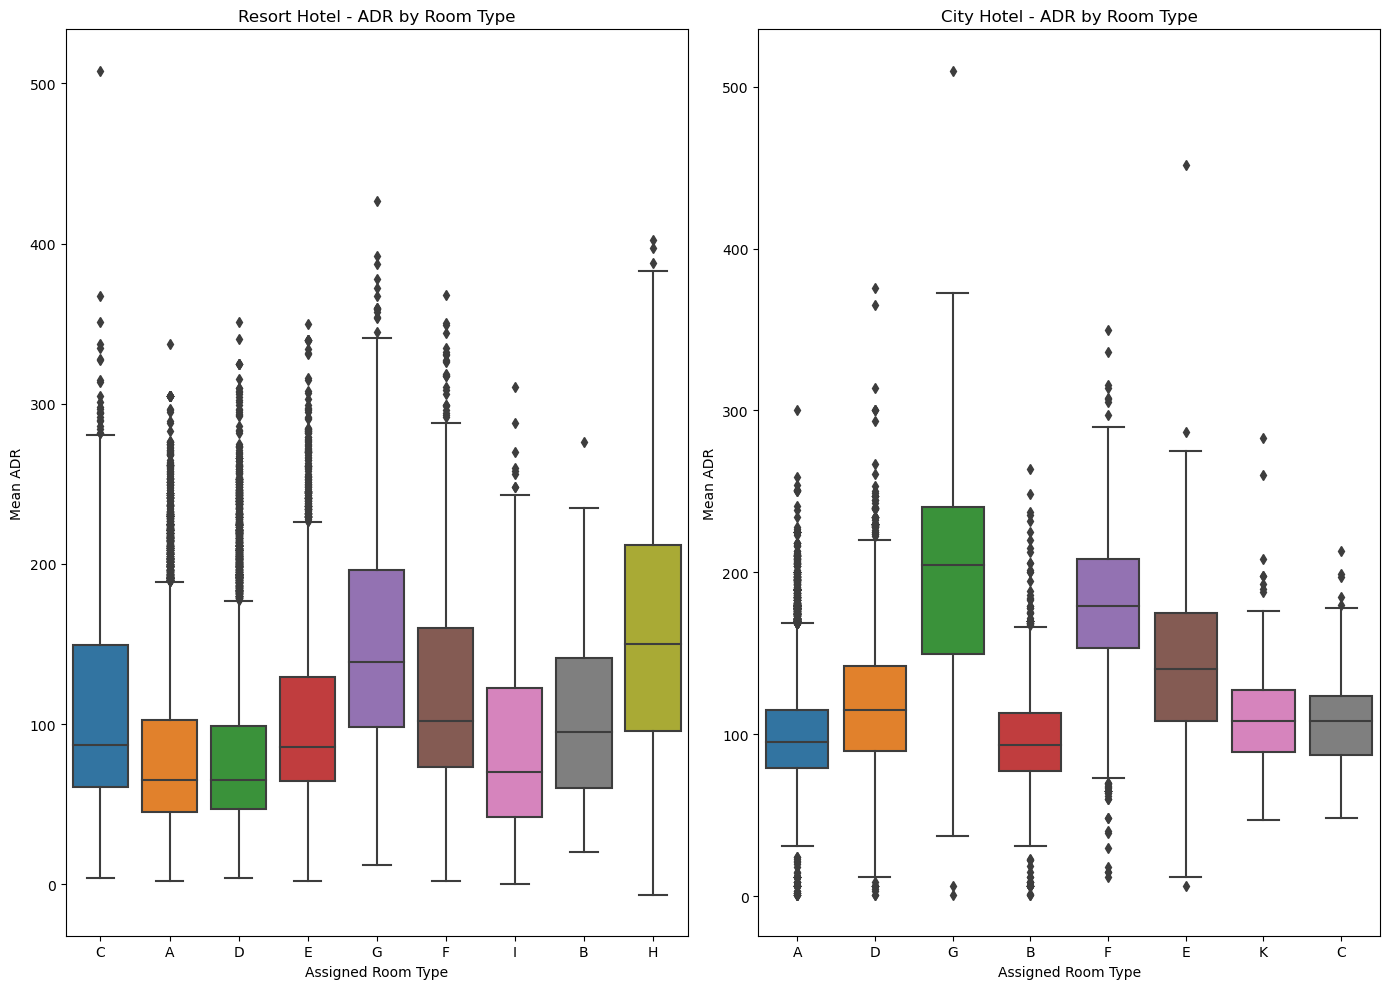

In [50]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Plot ADR for 'Resort Hotel' by assigned room type
sns.boxplot(x='assigned_room_type', y='adr', data=filtered_data[filtered_data['hotel'] == 'Resort Hotel'], ax=axes[0])
axes[0].set_xlabel('Assigned Room Type')
axes[0].set_ylabel('Mean ADR')
axes[0].set_title('Resort Hotel - ADR by Room Type')

# Plot ADR for 'City Hotel' by assigned room type
sns.boxplot(x='assigned_room_type', y='adr', data=filtered_data[filtered_data['hotel'] == 'City Hotel'], ax=axes[1])
axes[1].set_xlabel('Assigned Room Type')
axes[1].set_ylabel('Mean ADR')
axes[1].set_title('City Hotel - ADR by Room Type')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In order to mitigate the impact of outliers in the 'adr' distribution, I will impute the **median 'adr'** value for confirmed bookings with an 'adr' value of '0', considering the assigned room type and hotel.

In [51]:
# Reset the index of confirmed_bookings_not_0_adr to obtain a DataFrame
# with columns 'hotel', 'assigned_room_type', 'mean', and 'median'
confirmed_bookings_not_0_adr_reset = confirmed_bookings_not_0_adr.reset_index()

# Display the output (median)
confirmed_bookings_not_0_adr_reset[['hotel','assigned_room_type','median']]

,hotel,assigned_room_type,median
0,City Hotel,A,95.00
1,City Hotel,B,93.64
2,City Hotel,C,108.00
3,City Hotel,D,115.28
4,City Hotel,E,140.26
5,City Hotel,F,179.30
6,City Hotel,G,204.82
7,City Hotel,K,108.00
8,Resort Hotel,A,65.00
9,Resort Hotel,B,95.00


In [52]:
# Iterate through each case in confirmed_bookings_0_adr
for index, row in confirmed_bookings_0_adr.iterrows():
    # Extract 'hotel' and 'assigned_room_type'
    hotel = row['hotel']
    room_type = row['assigned_room_type']
    
    # Find the corresponding median 'adr' value from confirmed_bookings_not_0_adr_reset
    median_adr = confirmed_bookings_not_0_adr_reset[
        (confirmed_bookings_not_0_adr_reset['hotel'] == hotel) &
        (confirmed_bookings_not_0_adr_reset['assigned_room_type'] == room_type)]['median'].values[0]  # Extract the median value
    
    # Update the 'adr' value in the original DataFrame
    df.at[index, 'adr'] = median_adr

In [53]:
# Check changes
confirmed_bookings_0_adr = df[(df['is_canceled'] == 'No') & (df['adr'] == 0)]

display(Markdown(f"Now, there are {len(confirmed_bookings_0_adr)} confirmed bookings with an 'adr' value of 0."))

Now, there are 0 confirmed bookings with an 'adr' value of 0.

In [54]:
# Check impact on new average values
new_mean = df[df['is_canceled'] == 'No'].groupby(['hotel', 'assigned_room_type'])['adr'].agg(['mean'])

# Round the mean values to 2 decimals
new_mean = new_mean.round(2)

# Rename the 'mean' column
new_mean = new_mean.rename(columns={'mean': 'new_mean'})
confirmed_bookings_not_0_adr_reset = confirmed_bookings_not_0_adr_reset.rename(columns={'mean':'original_mean'})

# Reset the index
new_mean = new_mean.reset_index()

# Concatenate to previous median data
mean_changes = pd.concat([confirmed_bookings_not_0_adr_reset[['hotel','assigned_room_type','median','original_mean']], new_mean['new_mean']], axis=1, join='inner')

# Calculate mean difference
mean_changes['mean_difference'] = mean_changes['original_mean']-mean_changes['new_mean']

# Display mean_changes
mean_changes

,hotel,assigned_room_type,median,original_mean,new_mean,mean_difference
0,City Hotel,A,95.00,99.08,99.03,0.05
1,City Hotel,B,93.64,97.52,97.41,0.11
2,City Hotel,C,108.00,110.42,110.31,0.11
3,City Hotel,D,115.28,117.91,117.88,0.03
4,City Hotel,E,140.26,142.22,142.19,0.03
5,City Hotel,F,179.30,178.09,178.13,-0.04
6,City Hotel,G,204.82,196.60,197.36,-0.76
7,City Hotel,K,108.00,112.77,112.56,0.21
8,Resort Hotel,A,65.00,81.31,81.20,0.11
9,Resort Hotel,B,95.00,105.82,105.60,0.22


#### Reorder columns

In [55]:
# Check columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num', 'check_in_date', 'total_guests',
       'total_nights', 'weekend_or_weekday'],
      dtype='object')

In [56]:
# Specify new order of columns
new_order = [
    'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
    'arrival_date_month', 'arrival_date_month_num', 'arrival_date_week_number',
    'arrival_date_day_of_month',
    'check_in_date', 'total_nights','stays_in_weekend_nights',
    'stays_in_week_nights', 'weekend_or_weekday', 'adults', 'children', 'babies',
    'total_guests','country', 'meal', 'market_segment', 'distribution_channel',
    'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'reserved_room_type',
    'assigned_room_type', 'booking_changes', 'deposit_type',
    'days_in_waiting_list', 'customer_type', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests',
    'reservation_status', 'reservation_status_date'
]

In [57]:
# Calculate the number of columns in the original dataframe and in the new_order list
len_cols_df = len(df.columns)
len_cols_new_order = len(new_order)

# Check if the columns in the DataFrame exactly match the columns in the new_order list (regardless of order)
check_columns_match = set(df.columns) == set(new_order)
check_columns_match

True

In [58]:
# Reorder the columns in the DataFrame according to the new_order list
df = df[new_order]

# Display the first few rows of the updated DataFrame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_month_num,arrival_date_week_number,arrival_date_day_of_month,check_in_date,total_nights,stays_in_weekend_nights,stays_in_week_nights,weekend_or_weekday,adults,children,babies,total_guests,country,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Yes,342,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
1,Resort Hotel,Yes,737,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
2,Resort Hotel,No,7,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,No,13,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,No,14,2015,July,7,27,1,2015-07-01,2,0,2,stay_just_weekdays,2,0,0,2,GBR,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [59]:
# Display the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  object        
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_month_num          119210 non-null  int64         
 6   arrival_date_week_number        119210 non-null  int64         
 7   arrival_date_day_of_month       119210 non-null  int64         
 8   check_in_date                   119210 non-null  datetime64[ns]
 9   total_nights                    119210 non-null  int64         
 10  stays_in_weekend_nights         119210 non-null  int64  

#### Save dataset prepared for EDA

In [60]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('./Datasets/clean_EDA_data.csv', index = False)

### 3. EDA: Analyzing Hotel Demand

In the upcoming EDA section, we will strive to address various key questions related to confirmed hotel bookings. Our analysis will encompass understanding the countries of origin for guests, exploring the average room cost per night, identifying peak months for hotel occupancy, and highlighting months with the highest average daily rates (ADR). Additionally, we will investigate guests' stay patterns, categorizing bookings into weekday-only, weekend-only, or both. Throughout this exploration, we will make use of various visualization techniques, including the introduction of choropleth maps to enhance our geographical data representation.

In [61]:
# Import cleaned DataFrame
data = pd.read_csv('./Datasets/clean_EDA_data.csv')
display(data.head(), data.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_month_num,arrival_date_week_number,arrival_date_day_of_month,check_in_date,total_nights,stays_in_weekend_nights,stays_in_week_nights,weekend_or_weekday,adults,children,babies,total_guests,country,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Yes,342,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
1,Resort Hotel,Yes,737,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
2,Resort Hotel,No,7,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,No,13,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,No,14,2015,July,7,27,1,2015-07-01,2,0,2,stay_just_weekdays,2,0,0,2,GBR,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


(119210, 35)

What are the countries of origin for the guests?

In [62]:
# Filter for confirmed bookings (bookings not canceled)
confirmed_bookings = data[data['is_canceled'] == 'No']

# Calculate the total number of non-canceled bookings
len_not_canceled = len(confirmed_bookings)
len_not_canceled

74384

In [63]:
# Calculate the percentage of bookings from each country among non-canceled bookings
confirmed_bookings['country'].value_counts()/len_not_canceled

PRT    0.280208
GBR    0.129746
FRA    0.113694
ESP    0.085664
DEU    0.081563
         ...   
BHS    0.000013
SYC    0.000013
NPL    0.000013
ZMB    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [64]:
# Group the data by 'country' to calculate the total number of guests from each country
country_wise_data = confirmed_bookings.groupby('country')['total_guests'].sum().reset_index()

# Modify column names for clarity
country_wise_data.columns = ['country', 'no_of_guests']

# Add a new column for the percentage of total guests each country represents
country_wise_data['total_%'] = round((country_wise_data['no_of_guests'] / country_wise_data['no_of_guests'].sum()) * 100, 2)

# Sort the data in descending order based on the total number of guests
country_wise_data = country_wise_data.sort_values(by='no_of_guests', ascending=False)

# Reset the index to enhance readability
country_wise_data = country_wise_data.reset_index(drop=True)

# Display the top 10 countries with the highest number of guests
country_wise_data.head(10)

,country,no_of_guests,total_%
0,PRT,37254,25.72
1,GBR,19229,13.27
2,FRA,17281,11.93
3,ESP,13191,9.11
4,DEU,11659,8.05
5,IRL,5105,3.52
6,ITA,4882,3.37
7,BEL,3845,2.65
8,NLD,3371,2.33
9,USA,3205,2.21


In [65]:
# Import the necessary Plotly libraries
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize Plotly in notebook mode for interactive plotting
init_notebook_mode(connected=True)

# Import Plotly Express for simplified plotting
import plotly.express as px

In [66]:
# Plot a choropleth to check the distribution of guests' countries of origin.
map_guest = px.choropleth(country_wise_data,
                          locations=country_wise_data['country'],
                          color=country_wise_data['no_of_guests'],
                          hover_name=country_wise_data['country'])

# Center the title
map_guest.update_layout(
    title={'text': "Guest's Home Country (confirmed bookings)", 'x': 0.5}
)

# Display the choropleth map
map_guest.show()

In [67]:
display(Markdown(f"**{country_wise_data['country'][0]}** is the home country of the majority of the hotel's guests, accounting for {country_wise_data['total_%'][0]}% of the total. It is followed by **{country_wise_data['country'][1]}** at {country_wise_data['total_%'][1]}% and **{country_wise_data['country'][2]}** at {country_wise_data['total_%'][2]}%."))

**PRT** is the home country of the majority of the hotel's guests, accounting for 25.72% of the total. It is followed by **GBR** at 13.27% and **FRA** at 11.93%.

Are these countries the same for both hotels?

In [68]:
# Unique values of 'hotel' variable
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [69]:
# Calculate the percentage of customers for each country, grouped by unique values of 'hotels'
country_percentage_by_hotel = confirmed_bookings.groupby(['hotel', 'country'])['country'].count() / len_not_canceled * 100

# Convert the calculated percentages to a df and round the 'total_%' column
df_country_percentage_by_hotel = country_percentage_by_hotel.reset_index(name='total_%')
df_country_percentage_by_hotel['total_%'] = df_country_percentage_by_hotel['total_%'].round(2)

# Top 5 countries with the highest total percentages for each hotel
top_countries_by_hotel = df_country_percentage_by_hotel.groupby('hotel').apply(lambda x: x.nlargest(5, 'total_%')).reset_index(drop=True)

# Split the dataframe
top_countries_city = top_countries_by_hotel[top_countries_by_hotel['hotel'] == 'City Hotel'].reset_index(drop=True)
top_countries_resort = top_countries_by_hotel[top_countries_by_hotel['hotel'] == 'Resort Hotel'].reset_index(drop=True)

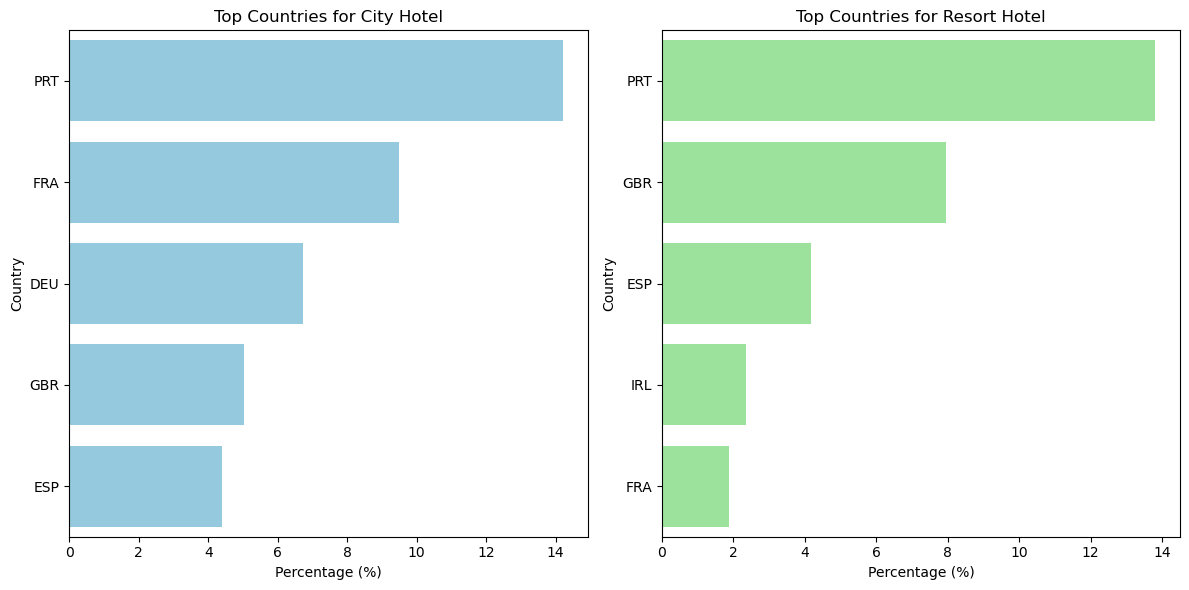

In [70]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'City Hotel'
sns.barplot(x='total_%', y='country', data=top_countries_city, ax=axes[0], color='skyblue')
axes[0].set_xlabel('Percentage (%)')
axes[0].set_ylabel('Country')
axes[0].set_title('Top Countries for City Hotel')

# Plot for 'Resort Hotel'
sns.barplot(x='total_%', y='country', data=top_countries_resort, ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('Country')
axes[1].set_title('Top Countries for Resort Hotel')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

What is the average cost that guests pay for a room per night?

Text(0, 0.5, 'price (EUR)')

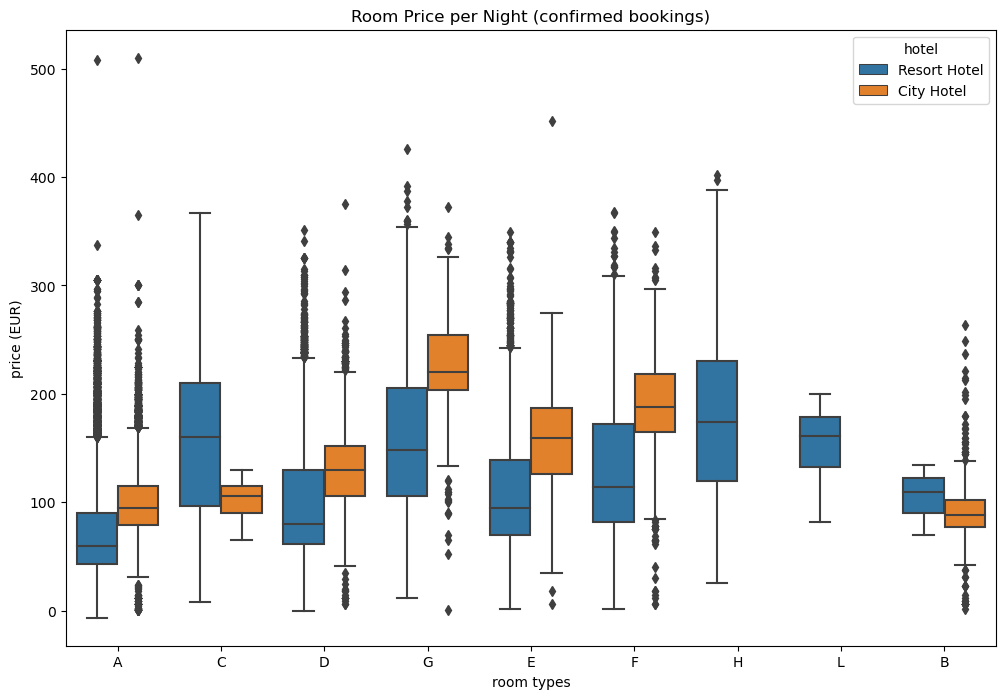

In [71]:
# Create a boxplot for room prices per night
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr', hue='hotel',data=confirmed_bookings)
plt.title('Room Price per Night (confirmed bookings)')
plt.xlabel('room types')
plt.ylabel('price (EUR)')

In [72]:
# Calculate median ADR by room type for each hotel
median_adr_by_room_type = confirmed_bookings.groupby(['hotel', 'reserved_room_type'])['adr'].median().reset_index()

# # Pivot the data to create a new DataFrame with 'reserved_room_type' as rows, 'hotel' as columns, and 'adr' values as values
pivot_df = median_adr_by_room_type.pivot(index='reserved_room_type', columns='hotel', values='adr')

# Find the rooms with highest median ADR rate for each hotel
max_CH = pivot_df['City Hotel'].idxmax()
max_RH = pivot_df['Resort Hotel'].idxmax()

# Display the pivoted DataFrame
display(pivot_df, Markdown(f"For the **City Hotel**, the room with the highest median ADR is **{max_CH}**, and for the **Resort Hotel**, it is **{max_RH}**."))

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,95.000,60.000
B,88.680,110.000
C,106.000,160.000
D,129.715,80.000
E,158.975,94.500
F,188.100,114.605
G,220.200,148.170
H,NaN,174.250
L,NaN,161.000


For the **City Hotel**, the room with the highest median ADR is **G**, and for the **Resort Hotel**, it is **H**.

Which months demonstrate the highest hotel occupancy rates based on the monthly number of bookings?

In [73]:
# Split data into Resort and City data (confirmed bookings)
data_resort = confirmed_bookings[confirmed_bookings['hotel'] == 'Resort Hotel']
data_city = confirmed_bookings[confirmed_bookings['hotel'] == 'City Hotel']

print('Resort Hotel data shape: ', data_resort.shape)
print('City Hotel data shape: ', data_city.shape)

Resort Hotel data shape:  (28555, 35)
City Hotel data shape:  (45829, 35)


In [74]:
# Count monthly bookings for each hotel

# For the Resort Hotel
monthly_bookings_resort = data_resort['arrival_date_month'].value_counts().reset_index()
monthly_bookings_resort.columns = ['month', 'no_of_bookings_resort']

# For the City Hotel
monthly_bookings_city = data_city['arrival_date_month'].value_counts().reset_index()
monthly_bookings_city.columns = ['month', 'no_of_bookings_city']

# Merge the data for both hotels
monthly_bookings_combined = monthly_bookings_resort.merge(monthly_bookings_city, on='month')
monthly_bookings_combined.columns = ['month', 'bookings_resort', 'bookings_city']

# Display the final result
monthly_bookings_combined

,month,bookings_resort,bookings_city
0,August,3223,5352
1,July,3096,4753
2,March,2543,4027
3,October,2533,4286
4,April,2530,4000
5,May,2497,4532
6,February,2288,3024
7,September,2094,4269
8,June,2011,4344
9,December,1962,2360


In [75]:
# Import the library to sort months (textual) in the proper order
import sort_dataframeby_monthorweek as sd

# Sort the DataFrame by month in chronological order
monthly_bookings_combined = sd.Sort_Dataframeby_Month(monthly_bookings_combined, 'month')
monthly_bookings_combined

,month,bookings_resort,bookings_city
0,January,1835,2233
1,February,2288,3024
2,March,2543,4027
3,April,2530,4000
4,May,2497,4532
5,June,2011,4344
6,July,3096,4753
7,August,3223,5352
8,September,2094,4269
9,October,2533,4286


In [76]:
# Select the top 3 months with the highest bookings for each hotel
top_3_resort = monthly_bookings_combined.nlargest(3, 'bookings_resort')['month']
top_3_city = monthly_bookings_combined.nlargest(3, 'bookings_city')['month']

# Convert the top months to a comma-separated string
top_3_resort_str = ', '.join(top_3_resort)
top_3_city_str = ', '.join(top_3_city)

# Display the results using Markdown
display(Markdown(f"For the **Resort Hotel**, the top 3 months with the highest bookings are **{top_3_resort_str}**, while for the **City Hotel**, they are **{top_3_city_str}**."))

For the **Resort Hotel**, the top 3 months with the highest bookings are **August, July, March**, while for the **City Hotel**, they are **August, July, May**.

In [77]:
# # Plot monthly booking data for both hotels
px.line(data_frame=monthly_bookings_combined,
       x='month',
       y=['bookings_resort', 'bookings_city'],
       title = 'Number of (confirmed) bookings by month')

Which month has the highest average daily rate (ADR)?

In [78]:
# Sort the DataFrame 'confirmed_bookings' by month in chronological order
confirmed_bookings = sd.Sort_Dataframeby_Month(confirmed_bookings, 'arrival_date_month')

In [79]:
# Display the first and last two rows of selected columns in the 'confirmed_bookings' DataFrame
display(confirmed_bookings[['hotel', 'arrival_date_month']].head(2), confirmed_bookings[['hotel', 'arrival_date_month']].tail(2))

,hotel,arrival_date_month
0,Resort Hotel,January
1,Resort Hotel,January


,hotel,arrival_date_month
74382,City Hotel,December
74383,City Hotel,December


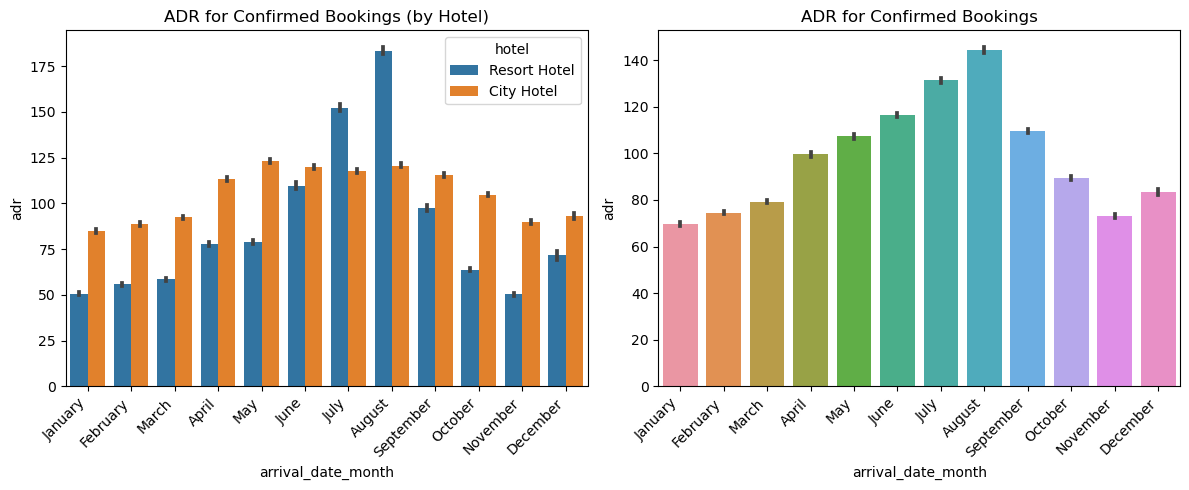

In [80]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ADR for not cancelled bookings in the first subplot by Hotel
sns.barplot(x='arrival_date_month', y='adr', data=confirmed_bookings, hue='hotel', ax=axes[0])
axes[0].set_title('ADR for Confirmed Bookings (by Hotel)')
axes[0].set_xticklabels(confirmed_bookings['arrival_date_month'].unique(), rotation=45, ha='right')

# Plot ADR for not cancelled bookings in the second subplot
sns.barplot(x='arrival_date_month', y='adr', data=confirmed_bookings, ax=axes[1])
axes[1].set_title('ADR for Confirmed Bookings')
axes[1].set_xticklabels(confirmed_bookings['arrival_date_month'].unique(), rotation=45, ha='right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

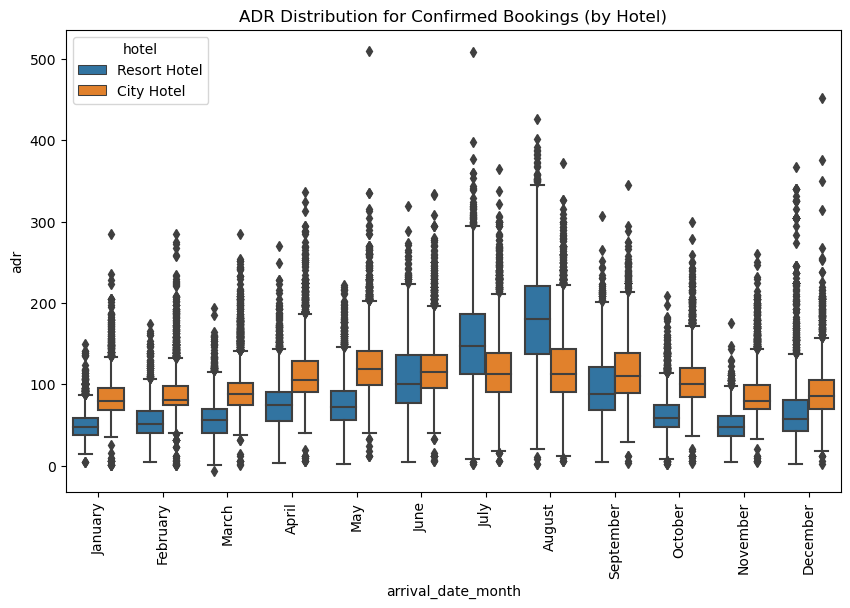

In [81]:
# Create a boxplot to visualize the distribution of Average Daily Rate (ADR) for confirmed bookings, grouped by hotel and month
plt.figure(figsize=(10,6))
sns.boxplot(x='arrival_date_month', y='adr', data=confirmed_bookings, hue='hotel')
plt.xticks(rotation='vertical')
plt.title('ADR Distribution for Confirmed Bookings (by Hotel)')
plt.show()

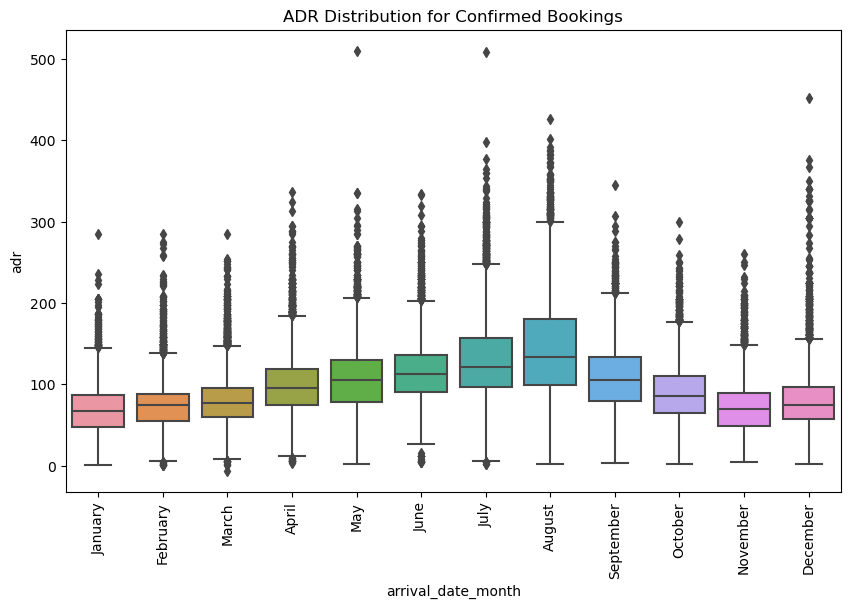

In [82]:
# Create a boxplot to visualize the distribution of Average Daily Rate (ADR) for confirmed bookings across all months
plt.figure(figsize=(10,6))
sns.boxplot(x='arrival_date_month', y='adr', data=confirmed_bookings)
plt.xticks(rotation='vertical')
plt.title('ADR Distribution for Confirmed Bookings')
plt.show()

Were the bookings made only for weekdays, only for weekends, or for both?

In [83]:
# Create a cross-tabulation (crosstab) table to analyze
# the relationship between weekend and weekday night stays for confirmed bookings
pd.crosstab(index=confirmed_bookings['stays_in_weekend_nights'], columns=confirmed_bookings['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,12138,9512,6734,2864,535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3593,4501,5162,4029,1598,725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1457,3820,4122,2976,1591,5679,516,284,275,53,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,198,173,281,84,31,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,70,223,136,75,49,656,15,14,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,22,4,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,2,2,3,1,36,4,2,1,14,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,2,0,0,0,0,0,0,0,0,0


In [84]:
# Calculate the total count of bookings categorized as either 'weekend' or 'weekday' or 'both'
confirmed_bookings['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31783
stay_just_weekend               5050
Name: weekend_or_weekday, dtype: int64

In [85]:
# Group data by month and week/weekend nights
group_data = confirmed_bookings.groupby(['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

# Sort data by month
sorted_data = sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

# Set 'arrival_date_month' as index
sorted_data.set_index('arrival_date_month', inplace=True)

sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend
arrival_date_month,,,
January,1550,2125,393
February,2438,2514,360
March,3151,3060,359
April,3627,2559,344
May,3442,3017,570
June,3241,2681,433
July,4570,2817,462
August,4929,3137,509
September,3192,2692,479


<AxesSubplot:xlabel='arrival_date_month'>

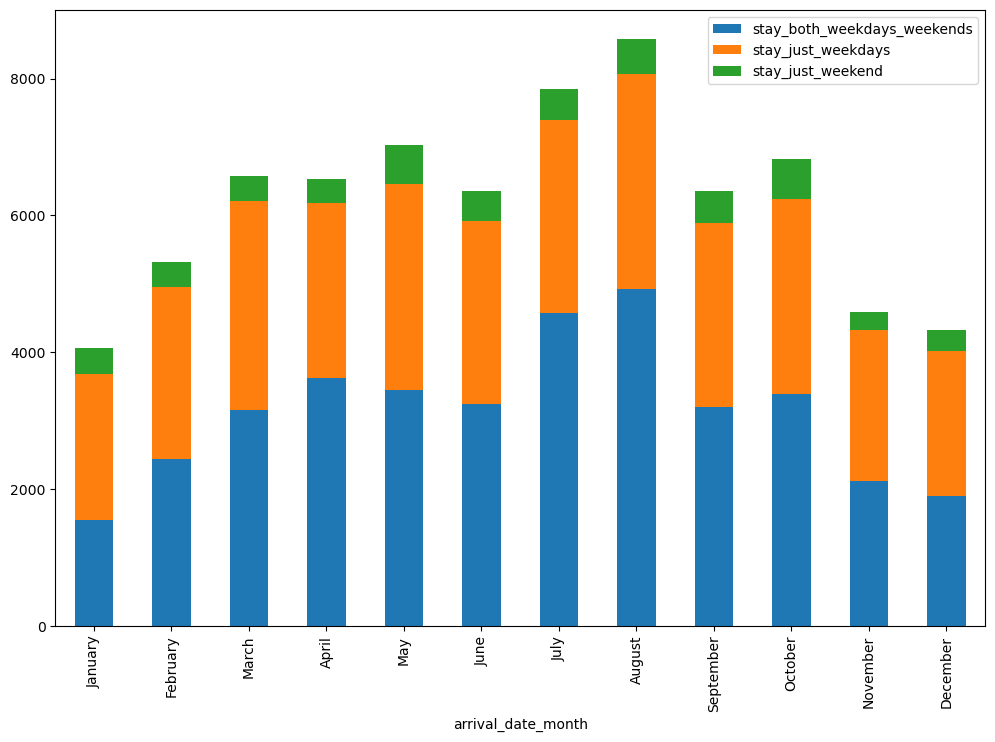

In [86]:
# Plot the stacked bar chart for monthly distribution of weekend and weekday bookings
sorted_data.plot(kind='bar', stacked=True, figsize=(12,8))

In [87]:
# Plot a 100% stacked barplot to visualize the distribution of stays by month and category
import plotly.graph_objects as go

# Calculate the percentages for each category within each month
total_stays = sorted_data.sum(axis=1)
sorted_data_percent = sorted_data.divide(total_stays, axis=0) * 100

# Create a 100% stacked barplot using Plotly
fig = go.Figure()

for col in sorted_data_percent.columns:
    fig.add_trace(go.Bar(
        x=sorted_data_percent.index,
        y=sorted_data_percent[col],
        name=col,
        hovertemplate='%{y:.2f}%',
    ))

# Customize the layout and appearance of the chart
fig.update_layout(
    title='100% Stacked Barplot of Stays by Month and Category',
    xaxis_title='Month',
    yaxis_title='Percentage (%)',
    barmode='relative',  # Stacked bars with relative heights
    height=400,
    legend=dict(
        title='',
        orientation='h',  # Horizontal legend placement
        yanchor='bottom',
        y=1.00,  # Adjust the y position for label placement
        xanchor='right',
        x=0.9,
    ),
)

# Show the interactive plot
fig.show()


After completing the EDA, we will revert the values of the 'is_canceled' variable back to 1 and 0 to keep it as it was originally, ready for data preprocessing and modeling in the next juopyter notebook kernel.

In [88]:
# Convert categorical 'is_canceled' to numerical values
data['is_canceled'] = data['is_canceled'].replace({'No': 0, 'Yes': 1})

In [89]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_month_num,arrival_date_week_number,arrival_date_day_of_month,check_in_date,total_nights,stays_in_weekend_nights,stays_in_week_nights,weekend_or_weekday,adults,children,babies,total_guests,country,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,342,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
1,Resort Hotel,1,737,2015,July,7,27,1,2015-07-01,0,0,0,undefined_data,2,0,0,2,PRT,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Canceled,2015-07-01
2,Resort Hotel,0,7,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,7,27,1,2015-07-01,1,0,1,stay_just_weekdays,1,0,0,1,GBR,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,7,27,1,2015-07-01,2,0,2,stay_just_weekdays,2,0,0,2,GBR,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [90]:
# Save the clean dataframe
data.to_csv('./Datasets/clean_EDA_data.csv', index = False)